In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = '/Users/a0000/Desktop/cafe 1 data.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')
df.columns = ['date', 'time', 'detected_people']  # 컬럼명 설정


In [5]:
# 2. 시간 변환
df['date'] = pd.to_datetime(df['date'])  # 날짜 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds().astype(int)  # 시간 컬럼을 초 단위로 변환


In [6]:
# 3. Gaussian 스무딩 적용
sigma = 10  # 스무딩 강도 설정
df['detected_people_smoothed'] = gaussian_filter1d(df['detected_people'], sigma)

# 로그 변환 (스무딩된 데이터에 적용)
df['log_detected_people'] = np.log1p(df['detected_people_smoothed'])  # 로그 변환 적용


In [7]:
# 4. Min-Max 스케일링
scaler = MinMaxScaler()  # Min-Max 스케일러 생성
df['scaled_log_detected_people'] = scaler.fit_transform(df[['log_detected_people']])  # 로그 변환된 값을 스케일링


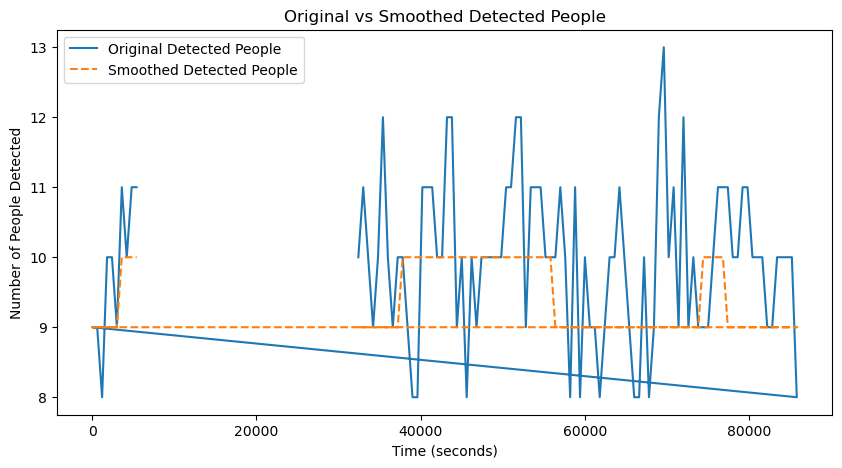

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = '/Users/a0000/Desktop/cafe 1 data.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')
df.columns = ['date', 'time', 'detected_people']  # 컬럼명 설정

# 2. 시간 변환
df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds().astype(int)  # Convert time column to seconds

# 3. Apply Gaussian smoothing
sigma = 10  # Smoothing strength
df['detected_people_smoothed'] = gaussian_filter1d(df['detected_people'], sigma)

# 4. Apply Min-Max scaling
scaler = MinMaxScaler()  # Create Min-Max scaler
df['scaled_detected_people'] = scaler.fit_transform(df[['detected_people_smoothed']])  # Scale smoothed values

# 5. Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(df['time'][:100], df['detected_people'][:100], label='Original Detected People')
plt.plot(df['time'][:100], df['detected_people_smoothed'][:100], label='Smoothed Detected People', linestyle='--')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of People Detected')
plt.legend()
plt.title('Original vs Smoothed Detected People')
plt.show()
